In [32]:
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
# TODO: Expedite reading/joining of several csv files
df = pd.read_csv("interlagos.csv", header = 0)

In [25]:
df = df.iloc[1:, :]

In [30]:
df["worst_tire_wear"] = df[[f"tire_wear{i}" for i in range(1, 5)]].min(axis = 1, )
df["delta_tire_wear"] = df["worst_tire_wear"].diff()
df["fuel_consumption"] = df["fuel"].diff()

In [31]:
df.head()

,time,fuel,tire_wear1,tire_wear2,tire_wear3,tire_wear4,worst_tire_wear,delta_tire_wear,fuel_consumption
2,106129,95.06,99.91,99.90,99.95,99.95,99.90,NaN,NaN
3,95415,92.48,99.86,99.84,99.93,99.93,99.84,-0.06,-2.58
4,92929,89.95,99.81,99.78,99.90,99.90,99.78,-0.06,-2.53
5,92985,87.42,99.76,99.72,99.88,99.88,99.72,-0.06,-2.53
6,92663,84.89,99.71,99.66,99.86,99.85,99.66,-0.06,-2.53


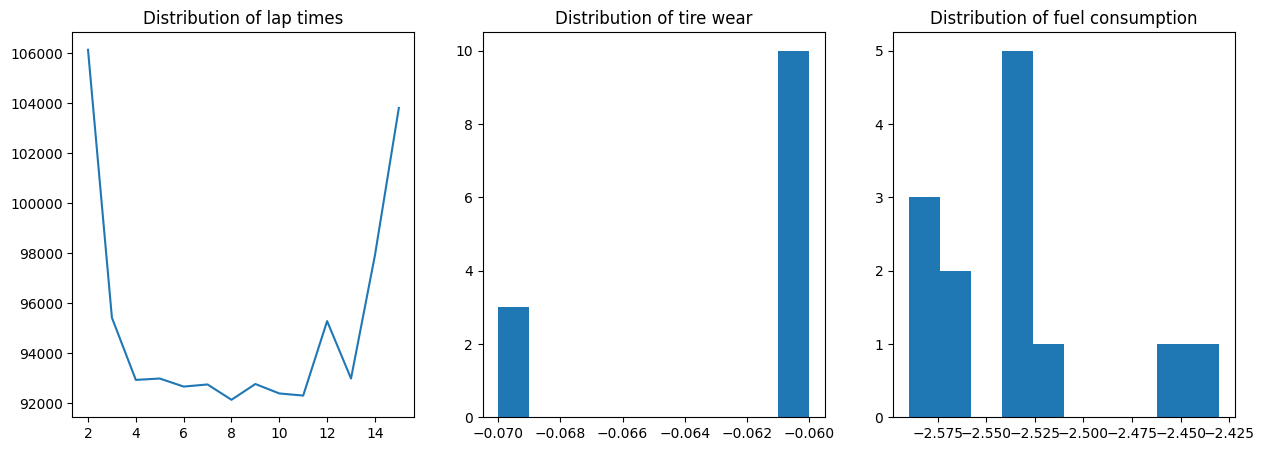

In [50]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 5))

axes[0].plot(df["time"])
axes[0].set_title("Distribution of lap times")
#axes[0].set_xticks(rotation = 45)

axes[1].hist(df["delta_tire_wear"])
axes[1].set_title("Distribution of tire wear")

axes[2].hist(df["fuel_consumption"])
axes[2].set_title("Distribution of fuel consumption")

plt.show()

In [15]:
df.columns

Index([''time'', ' 'fuel'', ' 'tire_wear1'', ' 'tire_wear2'', ' 'tire_wear3'',
       ' 'tire_wear4''],
      dtype='object')